In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model , load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, GlobalMaxPooling2D,GlobalAveragePooling2D, Dropout, Input, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, ResNet152, EfficientNetB0, InceptionV3, MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rarfile

from google.colab import drive
import os
import rarfile

# Mount Google Drive
drive.mount('/content/drive')

# Path to the RAR file in your Google Drive
rar_file_path = '/content/drive/MyDrive/SplittedDatasetReadyForYolo2.rar'

# Destination directory where you want to extract the files
extracted_dir_path = '/content/drive/MyDrive'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    file_list = rar_ref.namelist()
    for file in file_list:
        rar_ref.extract(file, extracted_dir_path)
        print(f"Extracted {file}")

print("Extraction complete.")

Streaming output truncated to the last 5000 lines.
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1653).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1654).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1656).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1657).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1658).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1660).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1662).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1663).jpg
Extracted SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/images/kidney/Tumor- (1664)

In [ ]:

!apt-get install rar

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the source directory and the output RAR file path
source_directory = '/content/drive/MyDrive/SplittedDatasetReady'
rar_file_path = '/content/drive/MyDrive/SplittedDatasetReadyYolo.rar'

# Create a RAR file from the specified directory
!rar a -r "$rar_file_path" "$source_directory"


Streaming output truncated to the last 5000 lines.
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (520).txt      43%  OK 
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (780).txt      43%  OK 
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (787).txt      43%  OK 
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (1111).txt      43%  OK 
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (772).txt      43%  OK 
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (83).txt      43%  OK 
Adding    /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Normal/Normal- (1099).txt      43%  

In [ ]:
from ultralytics import YOLO
import os
from PIL import Image


# Base directories for train, test, and validation datasets
base_dir = '/content/drive/MyDrive/TestImage-PFA'

# Output directory for cropped images
output_base_dir = '/content/drive/MyDrive/TestImage-PFAReady'

# List of folders
folders = [ 'train','validation','test']

# List of class folders
class_folders = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Function to create left and right subdirectories
def create_subdirectories(base_dir):
    left_dir = os.path.join(base_dir, 'left')
    right_dir = os.path.join(base_dir, 'right')
    os.makedirs(left_dir, exist_ok=True)
    os.makedirs(right_dir, exist_ok=True)
    return left_dir, right_dir

# Loop through each dataset (train, test, validation)
for dataset in folders:
    # Create output directories for left and right
    left_output_dir, right_output_dir = create_subdirectories(output_base_dir)

    # Loop through each class folder
    for class_folder in class_folders:
        # Input directory for images and labels
        input_images_dir = os.path.join(base_dir, dataset, 'images', class_folder)
        input_labels_dir = os.path.join(base_dir, dataset, 'labels', class_folder)

        # Output directory for cropped images
        left_output_images_dir = os.path.join(left_output_dir, dataset, 'images', class_folder)
        left_output_labels_dir = os.path.join(left_output_dir, dataset, 'labels', class_folder)
        right_output_images_dir = os.path.join(right_output_dir, dataset, 'images', class_folder)
        right_output_labels_dir = os.path.join(right_output_dir, dataset, 'labels', class_folder)

        os.makedirs(left_output_images_dir, exist_ok=True)
        os.makedirs(left_output_labels_dir, exist_ok=True)
        os.makedirs(right_output_images_dir, exist_ok=True)
        os.makedirs(right_output_labels_dir, exist_ok=True)

        # Get list of image files
        image_files = os.listdir(input_images_dir)

        # Iterate over image files and corresponding label files
        for image_file in image_files:
            # Load the image
            image_path = os.path.join(input_images_dir, image_file)
            image = Image.open(image_path)

            # Load corresponding label file
            label_file = image_file.replace(".jpg", ".txt")
            label_path = os.path.join(input_labels_dir, label_file)

            # Read label file to get bounding box coordinates
            with open(label_path, "r") as label_file:
                lines = label_file.readlines()

                # Check if there are exactly 2 bounding boxes
                if len(lines) == 2:
                    # Iterate over bounding boxes
                    for i, line in enumerate(lines):
                        class_id, x_center, y_center, width, height = map(float, line.strip().split())

                        # Calculate bounding box coordinates
                        x_min = int((x_center - width / 2) * image.width)
                        y_min = int((y_center - height / 2) * image.height)
                        x_max = int((x_center + width / 2) * image.width)
                        y_max = int((y_center + height / 2) * image.height)

                        # Crop the image based on bounding box
                        cropped_image = image.crop((x_min, y_min, x_max, y_max))

                        # Determine output directory based on index of bounding box
                        if x_center < 0.5:
                            output_image_path = os.path.join(left_output_images_dir, f"{class_folder}_{image_file}_{i}.jpg")
                            output_label_path = os.path.join(left_output_labels_dir, f"{class_folder}_{image_file}_{i}.txt")
                        else:
                            output_image_path = os.path.join(right_output_images_dir, f"{class_folder}_{image_file}_{i}.jpg")
                            output_label_path = os.path.join(right_output_labels_dir, f"{class_folder}_{image_file}_{i}.txt")

                        # Save the cropped image
                        cropped_image.save(output_image_path)

                        # Write corresponding label file
                        with open(output_label_path, 'w') as output_label_file:
                            output_label_file.write(line)

print("Cropping and sorting completed.")

Class 'Cyst': Total files = 1956
 - Train: 1095 (55.98%)
 - Validation: 274 (14.01%)
 - Test: 587 (30.01%)
Class 'Normal': Total files = 2254
 - Train: 1261 (55.94%)
 - Validation: 316 (14.02%)
 - Test: 677 (30.04%)
Class 'Stone': Total files = 816
 - Train: 456 (55.88%)
 - Validation: 115 (14.09%)
 - Test: 245 (30.02%)
Class 'Tumor': Total files = 1057
 - Train: 591 (55.91%)
 - Validation: 148 (14.00%)
 - Test: 318 (30.09%)
Dataset organized under /content/drive/MyDrive/SplitedDataset.


In [ ]:
import shutil

# Directory to be zipped
directory_to_zip = '/content/drive/MyDrive/SplitedDatasetReady'

# Zip file name
zip_file_name = '/content/drive/MyDrive/SplitedDatasetReady.zip'

# Create a zip file
shutil.make_archive(zip_file_name, 'zip', directory_to_zip)


'/content/drive/MyDrive/SplitedDatasetReady.zip.zip'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/images",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/validation/images",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/test/images",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    seed=123
)

Found 3247 files belonging to 4 classes.
Using 2598 files for training.
Found 772 files belonging to 4 classes.
Using 154 files for validation.
Found 1704 files belonging to 4 classes.


In [ ]:
# Cache and prefetch datasets
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# VGG16
vgg16= tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3))
vgg16.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = vgg16(inputs, training=True)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_vgg16 = tf.keras.Model(inputs, outputs)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Resnet50
resnet50= tf.keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(128,128,3))
resnet50.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = resnet50(inputs, training=True)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_resnet50 = tf.keras.Model(inputs, outputs)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
# MobileNet
mobilenet = tf.keras.applications.MobileNet(include_top=False, weights='imagenet', input_shape=(128,128,3))
mobilenet.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = mobilenet(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_mobilenet = tf.keras.Model(inputs, outputs)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
# InceptionV3
inception = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(128,128,3))
inception.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = inception(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_inception = tf.keras.Model(inputs, outputs)

In [ ]:
# EfficientNetB0
efficientnet = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(128,128,3))
efficientnet.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = efficientnet(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_efficientnet = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# VGG19
vgg19 = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(128,128,3))
vgg19.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = vgg19(inputs, training=True)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_vgg19 = tf.keras.Model(inputs, outputs)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# ResNet101
resnet101 = tf.keras.applications.ResNet101(include_top=False, weights='imagenet', input_shape=(128,128,3))
resnet101.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = resnet101(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_resnet101 = tf.keras.Model(inputs, outputs)

171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
# ResNet152
resnet152 = tf.keras.applications.ResNet152(include_top=False, weights='imagenet', input_shape=(128,128,3))
resnet152.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = resnet152(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model_resnet152 = tf.keras.Model(inputs, outputs)

234698864/234698864 [==============================] - 1s 0us/step


In [ ]:
model_vgg16.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_vgg16.fit(train_ds, epochs=50, validation_data=val_ds)

model_vgg16.save("model_vgg16_with_validation.h5")

test_loss, test_accuracy = model_vgg16.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


Epoch 1/50
108/108 [==============================] - 48s 266ms/step - loss: 9.5423 - accuracy: 0.4959 - val_loss: 1.2518 - val_accuracy: 0.3472
Epoch 2/50
108/108 [==============================] - 14s 132ms/step - loss: 0.6295 - accuracy: 0.7519 - val_loss: 0.5153 - val_accuracy: 0.8519
Epoch 3/50
108/108 [==============================] - 14s 133ms/step - loss: 0.2524 - accuracy: 0.9139 - val_loss: 0.2179 - val_accuracy: 0.9259
Epoch 4/50
108/108 [==============================] - 15s 136ms/step - loss: 0.1386 - accuracy: 0.9504 - val_loss: 0.2209 - val_accuracy: 0.8981
Epoch 5/50
108/108 [==============================] - 15s 138ms/step - loss: 0.0975 - accuracy: 0.9652 - val_loss: 0.0288 - val_accuracy: 0.9907
Epoch 6/50
108/108 [==============================] - 15s 139ms/step - loss: 0.0508 - accuracy: 0.9826 - val_loss: 0.1165 - val_accuracy: 0.9630
Epoch 7/50
108/108 [==============================] - 15s 141ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0427 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


73/73 [==============================] - 14s 168ms/step - loss: 1.8010e-04 - accuracy: 1.0000
Test Accuracy: 1.0
Test Loss: 0.00018009537598118186


In [ ]:
model_resnet50.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_resnet50.fit(train_ds, epochs=50, validation_data=val_ds)

model_resnet50.save("model_resnet50_with_validation.h5")

test_loss, test_accuracy = model_resnet50.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Epoch 1/50
108/108 [==============================] - 75s 248ms/step - loss: 1.9494 - accuracy: 0.8020 - val_loss: 0.1266 - val_accuracy: 0.9676
Epoch 2/50
108/108 [==============================] - 13s 122ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 0.0171 - val_accuracy: 0.9907
Epoch 3/50
108/108 [==============================] - 13s 122ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/50
108/108 [==============================] - 13s 124ms/step - loss: 0.0188 - accuracy: 0.9951 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/50
108/108 [==============================] - 14s 125ms/step - loss: 7.2828e-04 - accuracy: 1.0000 - val_loss: 1.3176e-04 - val_accuracy: 1.0000
Epoch 6/50
108/108 [==============================] - 14s 126ms/step - loss: 5.4796e-05 - accuracy: 1.0000 - val_loss: 1.1934e-04 - val_accuracy: 1.0000
Epoch 7/50
108/108 [==============================] - 14s 128ms/step - loss: 3.5189e-05 - accuracy: 1.0000 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


73/73 [==============================] - 12s 137ms/step - loss: 0.0106 - accuracy: 0.9978
Test Accuracy: 0.997840166091919
Test Loss: 0.010625666007399559


In [ ]:
model_mobilenet.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_mobilenet.fit(train_ds, epochs=50, validation_data=val_ds)

model_mobilenet.save("model_mobilenet_with_validation.h5")

test_loss, test_accuracy = model_mobilenet.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Epoch 1/50
108/108 [==============================] - 21s 65ms/step - loss: 0.1773 - accuracy: 0.9455 - val_loss: 0.0266 - val_accuracy: 0.9907
Epoch 2/50
108/108 [==============================] - 5s 43ms/step - loss: 0.0331 - accuracy: 0.9904 - val_loss: 0.0407 - val_accuracy: 0.9954
Epoch 3/50
108/108 [==============================] - 5s 44ms/step - loss: 0.0519 - accuracy: 0.9870 - val_loss: 0.0526 - val_accuracy: 0.9815
Epoch 4/50
108/108 [==============================] - 5s 42ms/step - loss: 0.0408 - accuracy: 0.9855 - val_loss: 0.0859 - val_accuracy: 0.9769
Epoch 5/50
108/108 [==============================] - 4s 42ms/step - loss: 0.0254 - accuracy: 0.9936 - val_loss: 0.3414 - val_accuracy: 0.9491
Epoch 6/50
108/108 [==============================] - 5s 44ms/step - loss: 0.0366 - accuracy: 0.9878 - val_loss: 0.3244 - val_accuracy: 0.9491
Epoch 7/50
108/108 [==============================] - 5s 42ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0190 - val_accuracy: 0.995

In [ ]:
model_inception.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_inception.fit(train_ds, epochs=50, validation_data=val_ds)

model_inception.save("model_inception_with_validation.h5")

test_loss, test_accuracy = model_inception.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

In [ ]:
model_efficientnet.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_efficientnet.fit(train_ds, epochs=50, validation_data=val_ds)

model_efficientnet.save("model_efficientnet_with_validation.h5")

test_loss, test_accuracy = model_efficientnet.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

In [ ]:
model_vgg19.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_vgg19.fit(train_ds, epochs=50, validation_data=val_ds)

model_vgg19.save("model_vgg19_with_validation.h5")

test_loss, test_accuracy = model_vgg19.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

In [ ]:
model_resnet101.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_resnet101.fit(train_ds, epochs=50, validation_data=val_ds)

model_resnet101.save("model_resnet101_with_validation.h5")

test_loss, test_accuracy = model_resnet101.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

In [ ]:
model_resnet152.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model_resnet152.fit(train_ds, epochs=50, validation_data=val_ds)

model_resnet152.save("model_resnet152_with_validation.h5")

test_loss, test_accuracy = model_resnet152.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

In [ ]:
##############################################################################################################################################################

In [ ]:
images_batch, labels_batch= next(iter(train_ds.take(1)))
print("taille des images batch",images_batch.shape)
print("taille des labels batch",labels_batch.shape)
class_names = train_ds.class_names
print(class_names)

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i + 1)
  plt.imshow(images_batch[i].numpy().astype('uint8'))
  plt.title(class_names[labels_batch[i]])
  plt.axis("off")
plt.show()

In [ ]:
tf.keras.utils.plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)

In [ ]:

"""
# Define and compile the model
num_classes = 4  # Number of classes in your dataset

model = tf.keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

# Save the model
model.save("model_with_validation.h5")
"""

In [ ]:
!pip install  ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model=YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:00<00:00, 118MB/s]


In [ ]:
model.train(data="/content/drive/MyDrive/SplittedDatasetReady/data.yaml", epochs=25)

Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/SplittedDatasetReady/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 42.8MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              


  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 6.23M/6.23M [00:00<00:00, 147MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/train/labels/Cyst.cache... 3246 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3246/3246 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/validation/labels/Cyst.cache... 772 images, 0 backgrounds, 0 corrupt: 100%|██████████| 772/772 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.13G      1.006      1.004      1.157         54        640: 100%|██████████| 203/203 [13:38<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:25<00:00,  5.83s/it]

                   all        772       1544       0.93      0.907      0.955      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      7.07G     0.9795     0.6097      1.145         41        640: 100%|██████████| 203/203 [01:56<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]

                   all        772       1544       0.94       0.94       0.98      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         7G     0.9681     0.5785      1.139         36        640: 100%|██████████| 203/203 [01:53<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]

                   all        772       1544      0.965       0.92      0.976       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      7.09G     0.9409     0.5393      1.124         33        640: 100%|██████████| 203/203 [01:53<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]

                   all        772       1544       0.89      0.882      0.918      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      7.01G     0.9228       0.51      1.122         49        640: 100%|██████████| 203/203 [01:52<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]

                   all        772       1544       0.96      0.915      0.973      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      7.07G     0.8859     0.4644       1.09         49        640: 100%|██████████| 203/203 [01:54<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]

                   all        772       1544      0.986      0.973      0.991      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      7.08G     0.8578     0.4536      1.085         39        640: 100%|██████████| 203/203 [01:52<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]

                   all        772       1544      0.975       0.97      0.991      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      7.08G     0.8395     0.4347      1.072         35        640: 100%|██████████| 203/203 [01:53<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]

                   all        772       1544      0.989      0.986      0.994      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         7G     0.8272     0.4215      1.075         43        640: 100%|██████████| 203/203 [01:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.77it/s]

                   all        772       1544      0.995      0.988      0.995      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       7.1G     0.8103     0.4071       1.07         43        640: 100%|██████████| 203/203 [01:53<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]

                   all        772       1544      0.991      0.989      0.995      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.09G     0.7968     0.4008      1.065         41        640: 100%|██████████| 203/203 [01:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]

                   all        772       1544      0.992       0.99      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      7.08G     0.7849     0.3859      1.056         49        640: 100%|██████████| 203/203 [01:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]

                   all        772       1544       0.99       0.99      0.995      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         7G     0.7642     0.3712      1.047         48        640: 100%|██████████| 203/203 [01:53<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]

                   all        772       1544      0.994       0.99      0.995      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      7.08G     0.7475     0.3631       1.03         33        640: 100%|██████████| 203/203 [01:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]

                   all        772       1544      0.991      0.982      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      7.08G     0.7285     0.3553      1.022         47        640: 100%|██████████| 203/203 [01:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.81it/s]

                   all        772       1544      0.994      0.988      0.994      0.596


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.07G      0.674     0.2933      1.003         27        640: 100%|██████████| 203/203 [01:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.79it/s]

                   all        772       1544      0.991      0.994      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      7.01G     0.6572     0.2839     0.9965         28        640: 100%|██████████| 203/203 [01:48<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.81it/s]

                   all        772       1544      0.991      0.994      0.995        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.08G     0.6379     0.2713     0.9754         28        640: 100%|██████████| 203/203 [01:48<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]

                   all        772       1544      0.991      0.993      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      7.06G      0.623     0.2655      0.973         28        640: 100%|██████████| 203/203 [01:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.85it/s]

                   all        772       1544       0.99      0.992      0.994      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      7.08G     0.6146     0.2595      0.967         28        640: 100%|██████████| 203/203 [01:49<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]

                   all        772       1544      0.992      0.989      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.99G     0.6064     0.2538     0.9628         28        640: 100%|██████████| 203/203 [01:49<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.75it/s]

                   all        772       1544      0.993      0.994      0.994      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.07G     0.5921     0.2412     0.9576         28        640: 100%|██████████| 203/203 [01:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]

                   all        772       1544      0.993      0.994      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.07G     0.5812     0.2357     0.9477         28        640: 100%|██████████| 203/203 [01:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.80it/s]

                   all        772       1544      0.993      0.994      0.994      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       7.1G     0.5689     0.2277     0.9409         28        640: 100%|██████████| 203/203 [01:48<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.85it/s]

                   all        772       1544      0.993      0.995      0.994      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         7G      0.561     0.2216      0.937         28        640: 100%|██████████| 203/203 [01:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.80it/s]

                   all        772       1544       0.99      0.995      0.994      0.636



25 epochs completed in 1.126 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.34it/s]


                   all        772       1544      0.994       0.99      0.995      0.698
                 Stone        772       1544      0.994       0.99      0.995      0.698
Speed: 0.3ms preprocess, 10.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b691cb2b430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
infer =YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

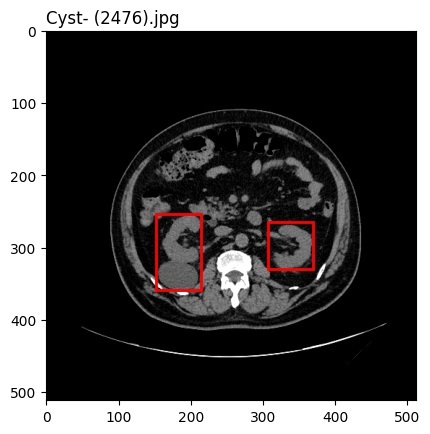

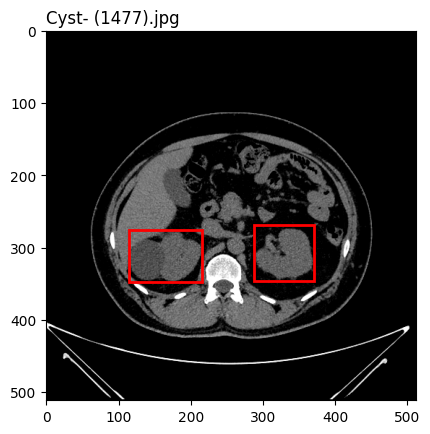

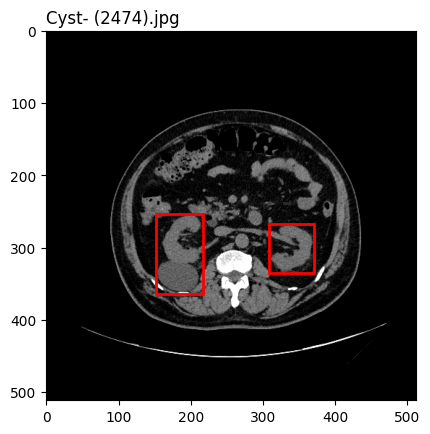

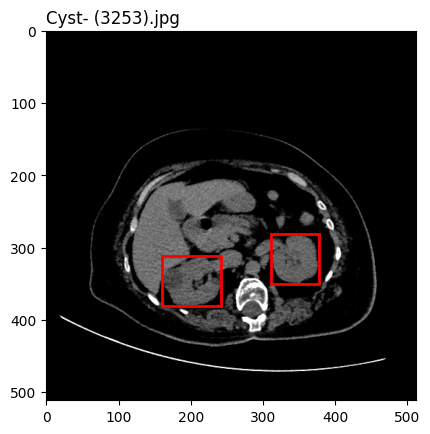

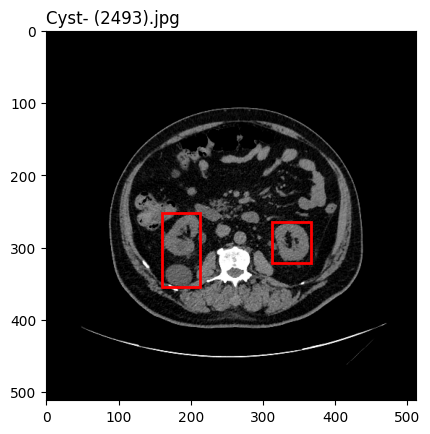

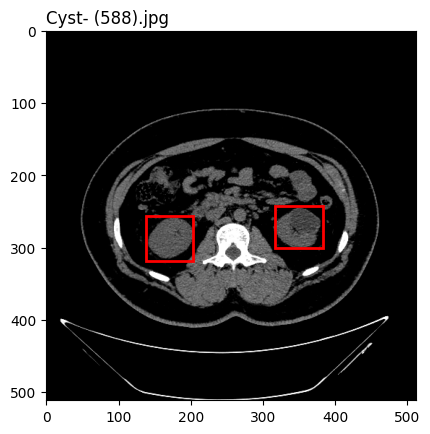

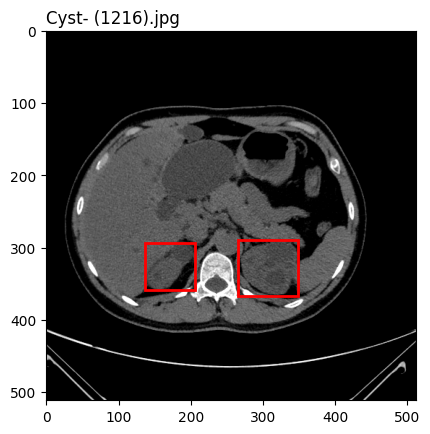

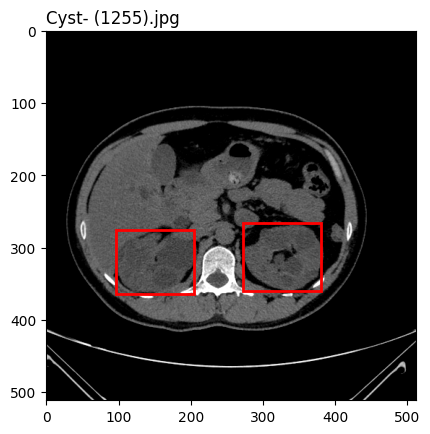

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Paths to image and label folders
image_folder = "/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/test/images/Cyst/"
label_folder = "/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/test/labels/Cyst/"

# Get list of image files
image_files = os.listdir(image_folder)

# Iterate over image files and corresponding label files
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Read the corresponding label file
    label_file = image_file.replace(".jpg", ".txt")
    label_path = os.path.join(label_folder, label_file)

    # Parse the label file to get bounding box coordinates
    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert YOLO format to pixel coordinates
            x_min = int((x_center - width / 2) * image.width)
            y_min = int((y_center - height / 2) * image.height)
            box_width = int(width * image.width)
            box_height = int(height * image.height)

            # Add bounding box to the plot
            rect = patches.Rectangle((x_min, y_min), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    # Get image name
    image_name = os.path.basename(image_path)

    # Display image name under the image
    plt.text(0, 1.02, image_name, transform=ax.transAxes, fontsize=12, color='black')

    # Show plot
    plt.show()


In [ ]:
from ultralytics import YOLO
import os
from PIL import Image

# Load your trained model
model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')

# Base directory for test images
base_test_dir = '/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady/test/images'

# List of class folders
class_folders = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Loop through each class folder and perform predictions
for folder in class_folders:
    test_images_dir = os.path.join(base_test_dir, folder)
    results = model.predict(source=test_images_dir)

    # Iterate through each image and its predictions
    for img_path, pred in results.items():
        # Check if the number of predicted bounding boxes is not equal to 2
        if len(pred.names) != 2:
            image = Image.open(img_path)  # Open the image using PIL
            pred.show()  # Display the image with bounding boxes


In [ ]:
from ultralytics import YOLO
import os
from PIL import Image


# Base directories for train, test, and validation datasets
base_dir = '/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady'

# Output directory for cropped images
output_base_dir = '/content/drive/MyDrive/SplittedDatasetReadyYOLO'

# List of folders
folders = ['test']

# List of class folders
class_folders = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Output directory for cropped images
output_images_dir = os.path.join(output_base_dir, 'yolo', 'images')
output_labels_dir = os.path.join(output_base_dir, 'yolo', 'labels')

os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_labels_dir, exist_ok=True)

# Function to create output directories
def create_output_directories(output_base_dir):
    output_images_dir = os.path.join(output_base_dir, 'yolo', 'images')
    output_labels_dir = os.path.join(output_base_dir, 'yolo', 'labels')
    os.makedirs(output_images_dir, exist_ok=True)
    os.makedirs(output_labels_dir, exist_ok=True)
    return output_images_dir, output_labels_dir

# Loop through each dataset (train, test, validation)
for dataset in folders:
    # Create output directories for YOLO
    output_images_dir, output_labels_dir = create_output_directories(output_base_dir)

    # Loop through each class folder
    for class_folder in class_folders:
        # Input directory for images and labels
        input_images_dir = os.path.join(base_dir, dataset, 'images', class_folder)
        input_labels_dir = os.path.join(base_dir, dataset, 'labels', class_folder)

        # Get list of image files
        image_files = os.listdir(input_images_dir)

        # Iterate over image files and corresponding label files
        for image_file in image_files:
            # Load the image
            image_path = os.path.join(input_images_dir, image_file)
            image = Image.open(image_path)

            # Load corresponding label file
            label_file = image_file.replace(".jpg", ".txt")
            label_path = os.path.join(input_labels_dir, label_file)

            # Read label file to get bounding box coordinates
            with open(label_path, "r") as label_file:
                lines = label_file.readlines()

                # Check if there are exactly 2 bounding boxes
                if len(lines) == 2:
                    # Iterate over bounding boxes
                    for i, line in enumerate(lines):
                        class_id, x_center, y_center, width, height = map(float, line.strip().split())

                        # Calculate bounding box coordinates
                        x_min = int((x_center - width / 2) * image.width)
                        y_min = int((y_center - height / 2) * image.height)
                        x_max = int((x_center + width / 2) * image.width)
                        y_max = int((y_center + height / 2) * image.height)

                        # Crop the image based on bounding box
                        cropped_image = image.crop((x_min, y_min, x_max, y_max))

                        # Determine output paths
                        output_image_path = os.path.join(output_images_dir, f"{class_folder}_{image_file}_{i}.jpg")
                        output_label_path = os.path.join(output_labels_dir, f"{class_folder}_{image_file}_{i}.txt")

                        # Save the cropped image
                        cropped_image.save(output_image_path)

                        # Write corresponding label file
                        with open(output_label_path, 'w') as output_label_file:
                            output_label_file.write(line)

print("Cropping and sorting completed.")


Cropping and sorting completed.


In [ ]:
import os

# Base directory for dataset
base_dir = "/content/drive/MyDrive/SplittedDatasetReady/SplittedDatasetReady"

# Categories and dataset types
categories = ['Cyst', 'Normal', 'Stone', 'Tumor']
dataset_types = ['train', 'test', 'validation']

# Function to check discrepancies
def check_discrepancies(images_dir, annotations_dir):
    all_images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    annotated_images = [f for f in os.listdir(annotations_dir) if f.endswith('.txt')]

    all_images_set = {os.path.splitext(f)[0] for f in all_images}
    annotated_images_set = {os.path.splitext(f)[0] for f in annotated_images}

    images_without_annotations = all_images_set - annotated_images_set
    annotations_without_images = annotated_images_set - all_images_set

    print(f"Checking in {images_dir}")
    print("Filenames of images without annotations:")
    for image in sorted(images_without_annotations):
        print(image)
    print("Number of images without annotations:", len(images_without_annotations))

    print(f"Checking in {annotations_dir}")
    print("Filenames of annotations without images:")
    for annotation in sorted(annotations_without_images):
        print(annotation)
    print("Number of annotations without images:", len(annotations_without_images))
    print("\n")

# Loop through dataset types and categories
for dataset_type in dataset_types:
    for category in categories:
        images_dir = os.path.join(base_dir, dataset_type, 'images', category)
        annotations_dir = os.path.join(base_dir, dataset_type, 'labels', category)
        check_discrepancies(images_dir, annotations_dir)


In [ ]:
right_train_ds = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/SplittedDatasetReadyPromax/right/train", image_size=(48,48), color_mode='rgb', batch_size=64, seed=123)
right_val_ds = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/SplittedDatasetReadyPromax/right/validation", image_size=(48,48), color_mode='rgb', batch_size=64, seed=124)

right_train_ds = right_train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
right_val_ds = right_val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 3167 files belonging to 4 classes.
Found 753 files belonging to 4 classes.


In [ ]:
left_train_ds = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/SplittedDatasetReadyPromax/left/train", image_size=(48,48), color_mode='rgb', batch_size=64, seed=123)

left_val_ds = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/SplittedDatasetReadyPromax/left/validation", image_size=(48,48), color_mode='rgb', batch_size=64, seed=124)

left_train_ds = left_train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
left_val_ds = left_val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 3167 files belonging to 4 classes.
Found 753 files belonging to 4 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
 tf.keras.layers.RandomFlip("horizontal"),
 tf.keras.layers.RandomRotation(0.3),
 tf.keras.layers.RandomZoom(0.5)])

In [ ]:
# VGG16
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1 = Input(shape=(48, 48, 3))
t1 = data_augmentation(input1)
input2 = Input(shape=(48, 48, 3))
t2 = data_augmentation(input2)

x = vgg16(t1, training=True)
y = vgg16(t2, training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(256)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
output = Dense(4, activation='softmax')(z)

vgg16_model = Model(inputs=[input1, input2], outputs=output)


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# VGG19
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1 = Input(shape=(48, 48, 3))
t1 = data_augmentation(input1)
input2 = Input(shape=(48, 48, 3))
t2 = data_augmentation(input2)

x = vgg19(t1, training=True)
y = vgg19(t2, training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(256)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
output = Dense(4, activation='softmax')(z)

vgg19_model = Model(inputs=[input1, input2], outputs=output)


80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
#Resnet50
resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1=tf.keras.Input(shape=(48,48,3))
t1=data_augmentation(input1)
input2=tf.keras.Input(shape=(48,48,3))
t2=data_augmentation(input2)

x=resnet50(t1,training=True)
y=resnet50(t2,training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x=tf.keras.layers.Dropout(0.2)(x)
y=tf.keras.layers.Dropout(0.2)(y)
z=tf.keras.layers.concatenate([x,y])
z=Dense(256)(z)
z=BatchNormalization()(z)
z=Activation('relu')(z)
output=Dense(4,activation='softmax')(z)
resnet50_model=tf.keras.Model(inputs=[input1,input2],outputs=output)


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# ResNet101
resnet101 = ResNet101(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1 = Input(shape=(48, 48, 3))
#t1 = data_augmentation(input1) #
input2 = Input(shape=(48, 48, 3))
#t2 = data_augmentation(input2) #

x = resnet101(input1, training=True) #input1 =>t1
y = resnet101(input2, training=True) #input2 =>t2
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
x = GlobalAveragePooling2D()(x)
y = GlobalAveragePooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(1024)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dense(512)(z)
z = Dropout(0,1)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)

output = Dense(4, activation='softmax')(z)

resnet101_model = Model(inputs=[input1, input2], outputs=output)

171446536/171446536 [==============================] - 9s 0us/step


In [ ]:
# ResNet152
resnet152 = ResNet152(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1 = Input(shape=(48, 48, 3))
t1 = data_augmentation(input1)
input2 = Input(shape=(48, 48, 3))
t2 = data_augmentation(input2)

x = resnet152(t1, training=True)
y = resnet152(t2, training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(256)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
output = Dense(4, activation='softmax')(z)

resnet152_model = Model(inputs=[input1, input2], outputs=output)


234698864/234698864 [==============================] - 11s 0us/step


In [ ]:
# EfficientNetB0
efficientnetb0 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1 = Input(shape=(48, 48, 3))
t1 = data_augmentation(input1)
input2 = Input(shape=(48, 48, 3))
t2 = data_augmentation(input2)

x = efficientnetb0(t1, training=True)
y = efficientnetb0(t2, training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(256)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
output = Dense(4, activation='softmax')(z)

efficientnetb0_model = Model(inputs=[input1, input2], outputs=output)


16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
# InceptionV3
inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(75, 75, 3))

input1 = Input(shape=(75, 75, 3))
t1 = data_augmentation(input1)
input2 = Input(shape=(75, 75, 3))
t2 = data_augmentation(input2)

x = inceptionv3(t1, training=True)
y = inceptionv3(t2, training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(256)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
output = Dense(4, activation='softmax')(z)

inceptionv3_model = Model(inputs=[input1, input2], outputs=output)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# MobileNet
mobilenet = MobileNet(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

input1 = Input(shape=(48, 48, 3))
t1 = data_augmentation(input1)
input2 = Input(shape=(48, 48, 3))
t2 = data_augmentation(input2)

x = mobilenet(t1, training=True)
y = mobilenet(t2, training=True)
x = GlobalMaxPooling2D()(x)
y = GlobalMaxPooling2D()(y)
x = Dropout(0.2)(x)
y = Dropout(0.2)(y)
z = concatenate([x, y])
z = Dense(256)(z)
z = BatchNormalization()(z)
z = Activation('relu')(z)
output = Dense(4, activation='softmax')(z)

mobilenet_model = Model(inputs=[input1, input2], outputs=output)


17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
def to_vect(p_dataset):
  image_vectors= []
  label_vectors= []
  for batch_images, batch_labels in p_dataset:
    image_vectors.extend(batch_images.numpy())
    label_vectors.extend(batch_labels.numpy())
  image_vectors= np.array(image_vectors)
  label_vectors= np.array(label_vectors)
  return image_vectors, label_vectors

In [ ]:
train_images_r, train_labels= to_vect(right_train_ds)
train_images_l, _= to_vect(left_train_ds)

val_images_r, val_labels= to_vect(right_val_ds)
val_images_l, _= to_vect(left_val_ds)

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.6271 - accuracy: 0.7427

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 23s 133ms/step - loss: 0.6271 - accuracy: 0.7427 - val_loss: 2.4675 - val_accuracy: 0.4104
Epoch 2/20
99/99 [==============================] - 9s 94ms/step - loss: 0.5128 - accuracy: 0.7913 - val_loss: 0.6315 - val_accuracy: 0.7291
Epoch 3/20
99/99 [==============================] - 9s 87ms/step - loss: 0.4638 - accuracy: 0.8134 - val_loss: 1.0659 - val_accuracy: 0.6813
Epoch 4/20
99/99 [==============================] - 11s 111ms/step - loss: 0.4720 - accuracy: 0.8219 - val_loss: 0.3777 - val_accuracy: 0.8327
Epoch 5/20
99/99 [==============================] - 8s 85ms/step - loss: 0.4080 - accuracy: 0.8462 - val_loss: 1.2139 - val_accuracy: 0.6587
Epoch 6/20
99/99 [==============================] - 9s 88ms/step - loss: 0.4168 - accuracy: 0.8459 - val_loss: 1.2851 - val_accuracy: 0.6786
Epoch 7/20
99/99 [==============================] - 9s 87ms/step - loss: 0.3741 - accuracy: 0.8677 - val_loss: 0.3897 - val_accuracy: 0.8393
Epoch 8/20
99/99 [==

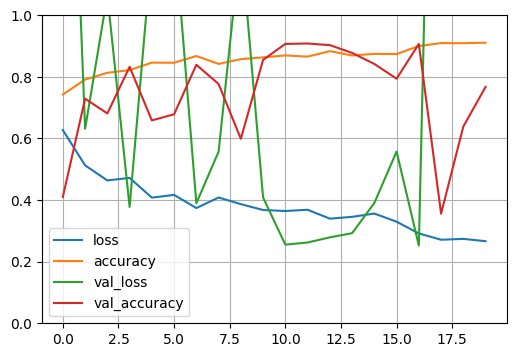

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/VGG16.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

vgg16_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = vgg16_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.6459 - accuracy: 0.7512

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 20s 129ms/step - loss: 0.6459 - accuracy: 0.7512 - val_loss: 3.1244 - val_accuracy: 0.4170
Epoch 2/20
99/99 [==============================] - 13s 127ms/step - loss: 0.5219 - accuracy: 0.7957 - val_loss: 0.7063 - val_accuracy: 0.7331
Epoch 3/20
99/99 [==============================] - 14s 144ms/step - loss: 0.4715 - accuracy: 0.8124 - val_loss: 0.4317 - val_accuracy: 0.8127
Epoch 4/20
99/99 [==============================] - 11s 108ms/step - loss: 0.4619 - accuracy: 0.8251 - val_loss: 0.5680 - val_accuracy: 0.8141
Epoch 5/20
99/99 [==============================] - 18s 180ms/step - loss: 0.4451 - accuracy: 0.8317 - val_loss: 0.3608 - val_accuracy: 0.8579
Epoch 6/20
99/99 [==============================] - 12s 126ms/step - loss: 0.4339 - accuracy: 0.8402 - val_loss: 0.3228 - val_accuracy: 0.8884
Epoch 7/20
99/99 [==============================] - 11s 108ms/step - loss: 0.3992 - accuracy: 0.8503 - val_loss: 1.4382 - val_accuracy: 0.6348
Epoch 8/20

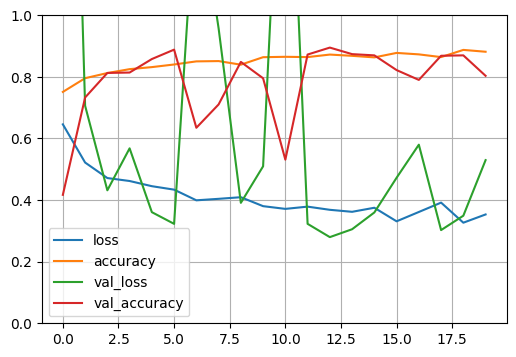

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/VGG19.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

vgg19_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = vgg19_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.8601

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 60s 198ms/step - loss: 0.3985 - accuracy: 0.8601 - val_loss: 0.2547 - val_accuracy: 0.9216
Epoch 2/20
99/99 [==============================] - 13s 133ms/step - loss: 0.2213 - accuracy: 0.9207 - val_loss: 0.1187 - val_accuracy: 0.9655
Epoch 3/20
99/99 [==============================] - 11s 111ms/step - loss: 0.1622 - accuracy: 0.9470 - val_loss: 0.2337 - val_accuracy: 0.9203
Epoch 4/20
99/99 [==============================] - 13s 132ms/step - loss: 0.1489 - accuracy: 0.9476 - val_loss: 0.0840 - val_accuracy: 0.9734
Epoch 5/20
99/99 [==============================] - 13s 136ms/step - loss: 0.1412 - accuracy: 0.9539 - val_loss: 0.0699 - val_accuracy: 0.9827
Epoch 6/20
99/99 [==============================] - 11s 107ms/step - loss: 0.1214 - accuracy: 0.9634 - val_loss: 0.0942 - val_accuracy: 0.9655
Epoch 7/20
99/99 [==============================] - 18s 179ms/step - loss: 0.1238 - accuracy: 0.9596 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 8/20

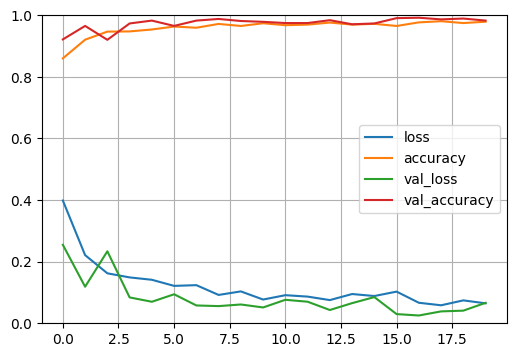

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/RESNET50.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

resnet50_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = resnet50_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8866

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 134s 554ms/step - loss: 0.3737 - accuracy: 0.8866 - val_loss: 0.3461 - val_accuracy: 0.9416
Epoch 2/20
99/99 [==============================] - 22s 225ms/step - loss: 0.1250 - accuracy: 0.9672 - val_loss: 0.1485 - val_accuracy: 0.9628
Epoch 3/20
99/99 [==============================] - 21s 214ms/step - loss: 0.0953 - accuracy: 0.9697 - val_loss: 0.0676 - val_accuracy: 0.9761
Epoch 4/20
99/99 [==============================] - 16s 161ms/step - loss: 0.0341 - accuracy: 0.9867 - val_loss: 0.1399 - val_accuracy: 0.9602
Epoch 5/20
99/99 [==============================] - 16s 159ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.1275 - val_accuracy: 0.9655
Epoch 6/20
99/99 [==============================] - 15s 154ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.1377 - val_accuracy: 0.9655
Epoch 7/20
99/99 [==============================] - 15s 154ms/step - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.1604 - val_accuracy: 0.9655
Epoch 8/2

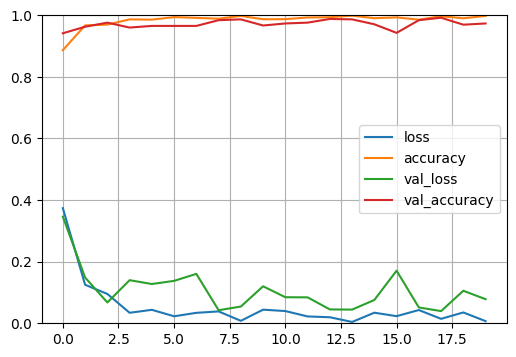

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/RESNET101.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

resnet101_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = resnet101_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.5276 - accuracy: 0.8248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 167s 413ms/step - loss: 0.5276 - accuracy: 0.8248 - val_loss: 0.2732 - val_accuracy: 0.9163
Epoch 2/20
99/99 [==============================] - 43s 437ms/step - loss: 0.2716 - accuracy: 0.9091 - val_loss: 0.2464 - val_accuracy: 0.9216
Epoch 3/20
99/99 [==============================] - 44s 449ms/step - loss: 0.2254 - accuracy: 0.9264 - val_loss: 0.1502 - val_accuracy: 0.9416
Epoch 4/20
99/99 [==============================] - 45s 459ms/step - loss: 0.1741 - accuracy: 0.9419 - val_loss: 0.1040 - val_accuracy: 0.9681
Epoch 5/20
99/99 [==============================] - 41s 420ms/step - loss: 0.1586 - accuracy: 0.9485 - val_loss: 0.0935 - val_accuracy: 0.9695
Epoch 6/20
99/99 [==============================] - 25s 255ms/step - loss: 0.1542 - accuracy: 0.9488 - val_loss: 0.1201 - val_accuracy: 0.9588
Epoch 7/20
99/99 [==============================] - 45s 454ms/step - loss: 0.1357 - accuracy: 0.9523 - val_loss: 0.0760 - val_accuracy: 0.9734
Epoch 8/2

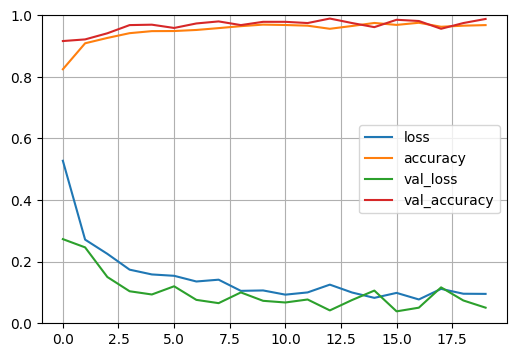

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/RESNET152.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

resnet152_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = resnet152_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.4351 - accuracy: 0.8358

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 59s 126ms/step - loss: 0.4351 - accuracy: 0.8358 - val_loss: 0.3318 - val_accuracy: 0.9031
Epoch 2/20
99/99 [==============================] - 8s 82ms/step - loss: 0.1929 - accuracy: 0.9337 - val_loss: 0.1432 - val_accuracy: 0.9522
Epoch 3/20
99/99 [==============================] - 10s 99ms/step - loss: 0.1158 - accuracy: 0.9615 - val_loss: 0.1101 - val_accuracy: 0.9641
Epoch 4/20
99/99 [==============================] - 8s 78ms/step - loss: 0.1312 - accuracy: 0.9545 - val_loss: 0.1130 - val_accuracy: 0.9535
Epoch 5/20
99/99 [==============================] - 10s 97ms/step - loss: 0.1011 - accuracy: 0.9653 - val_loss: 0.0979 - val_accuracy: 0.9655
Epoch 6/20
99/99 [==============================] - 10s 105ms/step - loss: 0.0844 - accuracy: 0.9735 - val_loss: 0.0939 - val_accuracy: 0.9602
Epoch 7/20
99/99 [==============================] - 9s 89ms/step - loss: 0.0874 - accuracy: 0.9659 - val_loss: 0.0568 - val_accuracy: 0.9774
Epoch 8/20
99/99 [

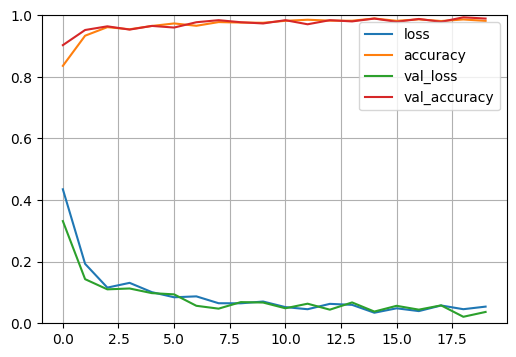

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/EFFICIENTNETB0.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

efficientnetb0_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = efficientnetb0_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.7941

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 73s 272ms/step - loss: 0.5801 - accuracy: 0.7941 - val_loss: 0.2998 - val_accuracy: 0.9084
Epoch 2/20
99/99 [==============================] - 16s 160ms/step - loss: 0.2941 - accuracy: 0.9094 - val_loss: 0.2496 - val_accuracy: 0.9097
Epoch 3/20
99/99 [==============================] - 17s 169ms/step - loss: 0.2161 - accuracy: 0.9327 - val_loss: 0.1423 - val_accuracy: 0.9495
Epoch 4/20
99/99 [==============================] - 20s 205ms/step - loss: 0.2413 - accuracy: 0.9223 - val_loss: 0.1186 - val_accuracy: 0.9641
Epoch 5/20
99/99 [==============================] - 11s 107ms/step - loss: 0.1806 - accuracy: 0.9403 - val_loss: 0.4426 - val_accuracy: 0.8805
Epoch 6/20
99/99 [==============================] - 11s 111ms/step - loss: 0.2021 - accuracy: 0.9331 - val_loss: 0.2307 - val_accuracy: 0.9296
Epoch 7/20
99/99 [==============================] - 10s 104ms/step - loss: 0.1595 - accuracy: 0.9485 - val_loss: 0.1329 - val_accuracy: 0.9602
Epoch 8/20

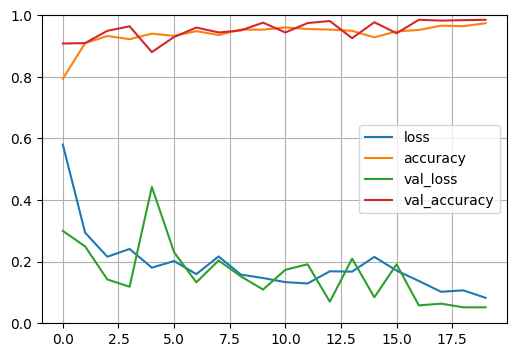

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/INCEPTIONV3.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

inceptionv3_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = inceptionv3_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8358

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 23s 67ms/step - loss: 0.4393 - accuracy: 0.8358 - val_loss: 0.3177 - val_accuracy: 0.9057
Epoch 2/20
99/99 [==============================] - 4s 39ms/step - loss: 0.2250 - accuracy: 0.9283 - val_loss: 0.1529 - val_accuracy: 0.9509
Epoch 3/20
99/99 [==============================] - 4s 41ms/step - loss: 0.1729 - accuracy: 0.9419 - val_loss: 0.1110 - val_accuracy: 0.9641
Epoch 4/20
99/99 [==============================] - 4s 43ms/step - loss: 0.1612 - accuracy: 0.9460 - val_loss: 0.1095 - val_accuracy: 0.9641
Epoch 5/20
99/99 [==============================] - 4s 43ms/step - loss: 0.1203 - accuracy: 0.9583 - val_loss: 0.1063 - val_accuracy: 0.9655
Epoch 6/20
99/99 [==============================] - 3s 35ms/step - loss: 0.1055 - accuracy: 0.9637 - val_loss: 0.1232 - val_accuracy: 0.9509
Epoch 7/20
99/99 [==============================] - 5s 52ms/step - loss: 0.0890 - accuracy: 0.9706 - val_loss: 0.0592 - val_accuracy: 0.9788
Epoch 8/20
99/99 [=====

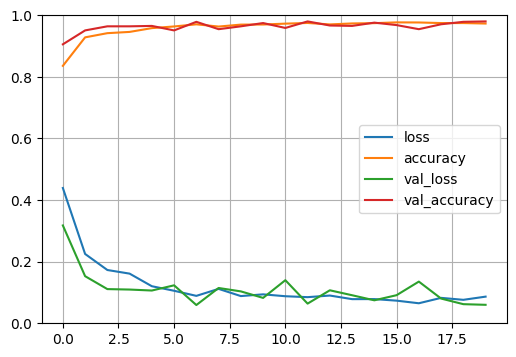

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/MOBILENET.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

mobilenet_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history = mobilenet_model.fit([train_images_r, train_images_l], train_labels,
                          validation_data=([val_images_r, val_images_l], val_labels),
                          epochs=20,
                          callbacks=[checkpoint])
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
right_test_ds = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/SplittedDatasetReadyPromax/right/test", image_size=(48,48),color_mode='rgb', batch_size=64,seed=125)
left_test_ds = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/SplittedDatasetReadyPromax/left/test", image_size=(48,48),color_mode='rgb', batch_size=64,seed=125)


Found 180 files belonging to 4 classes.
Found 180 files belonging to 4 classes.


In [ ]:
right_test_ds= right_test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
left_test_ds= left_test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
test_images_r, test_labels= to_vect(right_test_ds)
test_images_l, _= to_vect(left_test_ds)

In [ ]:
vgg16_model = load_model('/content/drive/MyDrive/Best Models/VGG16.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = vgg16_model.evaluate([test_images_r, test_images_l], test_labels)
print('VGG16 Test accuracy:', test_accuracy)
print('VGG16 Test loss:', test_loss)

6/6 [==============================] - 2s 300ms/step - loss: 3.1124 - accuracy: 0.4556
VGG16 Test accuracy: 0.4555555582046509
VGG16 Test loss: 3.112433910369873


In [ ]:
vgg19_model = load_model('/content/drive/MyDrive/Best Models/VGG19.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = vgg19_model.evaluate([test_images_r, test_images_l], test_labels)
print('VGG19 Test accuracy:', test_accuracy)
print('VGG19 Test loss:', test_loss)

6/6 [==============================] - 1s 41ms/step - loss: 5.3344 - accuracy: 0.3611
VGG19 Test accuracy: 0.3611111044883728
VGG19 Test loss: 5.334404468536377


In [ ]:
resnet50_model = load_model('/content/drive/MyDrive/Best Models/RESNET50.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = resnet50_model.evaluate([test_images_r, test_images_l], test_labels)
print('RESNET50 Test accuracy:', test_accuracy)
print('RESNET50 Test loss:', test_loss)

6/6 [==============================] - 5s 185ms/step - loss: 4.7237 - accuracy: 0.4111
RESNET50 Test accuracy: 0.41111111640930176
RESNET50 Test loss: 4.723658561706543


In [ ]:
resnet101_model = load_model('/content/drive/MyDrive/RESNET101.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = resnet101_model.evaluate([test_images_r, test_images_l], test_labels)
print('RESNET101 Test accuracy:', test_accuracy)
print('RESNET101 Test loss:', test_loss)


6/6 [==============================] - 5s 221ms/step - loss: 4.2921 - accuracy: 0.4722
RESNET101 Test accuracy: 0.4722222089767456
RESNET101 Test loss: 4.292145252227783


In [ ]:
resnet152_model = load_model('/content/drive/MyDrive/Best Models/RESNET152.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = resnet152_model.evaluate([test_images_r, test_images_l], test_labels)
print('RESNET152 Test accuracy:', test_accuracy)
print('RESNET152 Test loss:', test_loss)


In [ ]:
efficientnetb0_model = load_model('/content/drive/MyDrive/Best Models/EFFICIENTNETB0.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = efficientnetb0_model.evaluate([test_images_r, test_images_l], test_labels)
print('EFFICIENTNETB0 Test accuracy:', test_accuracy)
print('EFFICIENTNETB0 Test loss:', test_loss)


6/6 [==============================] - 4s 51ms/step - loss: 5.4152 - accuracy: 0.3667
EFFICIENTNETB0 Test accuracy: 0.36666667461395264
EFFICIENTNETB0 Test loss: 5.415204048156738


In [ ]:
inceptionv3_model = load_model('/content/drive/MyDrive/Best Models/INCEPTIONV3.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = inceptionv3_model.evaluate([test_images_r, test_images_l], test_labels)
print('INCEPTIONV3 Test accuracy:', test_accuracy)
print('INCEPTIONV3 Test loss:', test_loss)


6/6 [==============================] - 6s 303ms/step - loss: 2.9037 - accuracy: 0.5000
INCEPTIONV3 Test accuracy: 0.5
INCEPTIONV3 Test loss: 2.9036715030670166


In [ ]:
mobilenet_model = load_model('/content/drive/MyDrive/Best Models/MOBILENET.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = mobilenet_model.evaluate([test_images_r, test_images_l], test_labels)
print('MOBILENET Test accuracy:', test_accuracy)
print('MOBILENET Test loss:', test_loss)


6/6 [==============================] - 1s 79ms/step - loss: 4.5228 - accuracy: 0.4056
MOBILENET Test accuracy: 0.4055555462837219
MOBILENET Test loss: 4.522819519042969


In [ ]:
!pip install  ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 52.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="/content/drive/MyDrive/SplittedDatasetReadyForYolo2/data.yaml", epochs=80, imgsz=640)

100%|██████████| 6.23M/6.23M [00:00<00:00, 281MB/s]


Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/SplittedDatasetReadyForYolo2/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/labels/kidney... 3179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3179/3179 [01:10<00:00, 45.41it/s] 


train: New cache created: /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/labels/kidney.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/validation/labels/kidney... 753 images, 0 backgrounds, 0 corrupt: 100%|██████████| 753/753 [00:11<00:00, 64.59it/s] 


val: New cache created: /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/validation/labels/kidney.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      2.59G       1.01      1.347      1.114         41        640: 100%|██████████| 199/199 [01:46<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.45it/s]


                   all        753       1506       0.94       0.92      0.965      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      2.28G     0.9812     0.7275      1.092         27        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]


                   all        753       1506       0.97      0.949      0.981      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      2.27G     0.9573     0.6022      1.076         34        640: 100%|██████████| 199/199 [01:36<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


                   all        753       1506      0.943      0.934      0.976      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      2.26G     0.9509     0.5709      1.077         40        640: 100%|██████████| 199/199 [01:35<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        753       1506      0.985      0.986      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      2.27G     0.9106     0.5191      1.063         38        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.00it/s]

                   all        753       1506      0.983      0.971      0.992      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      2.27G     0.8889     0.4954      1.051         21        640: 100%|██████████| 199/199 [01:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]

                   all        753       1506      0.991      0.973      0.994      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      2.27G     0.8738     0.4799      1.045         34        640: 100%|██████████| 199/199 [01:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.00it/s]

                   all        753       1506      0.989      0.976      0.993       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      2.26G     0.8664      0.464      1.039         52        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.11it/s]

                   all        753       1506      0.992      0.989      0.995      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      2.25G     0.8448     0.4511      1.031         33        640: 100%|██████████| 199/199 [01:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]

                   all        753       1506      0.993      0.985      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      2.27G     0.8326     0.4343      1.023         27        640: 100%|██████████| 199/199 [01:27<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]

                   all        753       1506      0.977      0.975      0.991      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      2.27G     0.8278     0.4236      1.026         30        640: 100%|██████████| 199/199 [01:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]

                   all        753       1506      0.979      0.991      0.994      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      2.26G     0.8192     0.4167      1.015         45        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]

                   all        753       1506      0.993      0.992      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      2.27G     0.7993     0.4054      1.011         28        640: 100%|██████████| 199/199 [01:33<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]

                   all        753       1506      0.997      0.993      0.995      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      2.27G      0.798     0.4026      1.007         41        640: 100%|██████████| 199/199 [01:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]

                   all        753       1506      0.991      0.988      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      2.27G     0.7825     0.3953     0.9943         34        640: 100%|██████████| 199/199 [01:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]

                   all        753       1506      0.994      0.995      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      2.26G     0.7904     0.3947      1.007         29        640: 100%|██████████| 199/199 [01:39<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]

                   all        753       1506      0.988      0.991      0.995      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      2.27G     0.7734     0.3865     0.9977         39        640: 100%|██████████| 199/199 [01:29<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]


                   all        753       1506      0.995      0.994      0.995      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      2.25G     0.7653     0.3783     0.9992         23        640: 100%|██████████| 199/199 [01:27<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        753       1506      0.993      0.994      0.994      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      2.27G     0.7645     0.3809     0.9943         37        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        753       1506      0.997      0.995      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      2.24G     0.7691     0.3745     0.9965         34        640: 100%|██████████| 199/199 [01:32<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.42it/s]

                   all        753       1506      0.995      0.995      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      2.27G     0.7503     0.3728     0.9874         34        640: 100%|██████████| 199/199 [01:36<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]

                   all        753       1506      0.994      0.988      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      2.27G     0.7382     0.3651       0.98         49        640: 100%|██████████| 199/199 [01:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.73it/s]

                   all        753       1506      0.993      0.993      0.995      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      2.27G     0.7436      0.366      0.984         45        640: 100%|██████████| 199/199 [01:35<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.11it/s]


                   all        753       1506      0.995      0.996      0.995      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      2.26G      0.743     0.3593     0.9854         27        640: 100%|██████████| 199/199 [01:32<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.03it/s]

                   all        753       1506      0.996      0.994      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      2.27G     0.7469     0.3632     0.9903         35        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]

                   all        753       1506      0.997      0.991      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      2.25G      0.733     0.3542     0.9821         41        640: 100%|██████████| 199/199 [01:34<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.25it/s]

                   all        753       1506      0.994      0.996      0.995      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      2.27G     0.7203     0.3499     0.9747         46        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.18it/s]

                   all        753       1506      0.993      0.995      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      2.26G     0.7172     0.3483      0.973         39        640: 100%|██████████| 199/199 [01:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]

                   all        753       1506      0.994      0.991      0.995      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      2.27G     0.7204     0.3459     0.9773         31        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]

                   all        753       1506      0.994      0.994      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      2.27G     0.7108     0.3385      0.971         33        640: 100%|██████████| 199/199 [01:27<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]

                   all        753       1506      0.991      0.992      0.994      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      2.27G     0.7113     0.3357       0.97         35        640: 100%|██████████| 199/199 [01:33<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]

                   all        753       1506      0.995      0.994      0.995       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      2.26G     0.6963     0.3312     0.9659         38        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.30it/s]

                   all        753       1506      0.991      0.991      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      2.27G     0.6979     0.3271     0.9555         31        640: 100%|██████████| 199/199 [01:35<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        753       1506      0.994      0.994      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      2.26G     0.6953     0.3297      0.962         23        640: 100%|██████████| 199/199 [01:27<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        753       1506      0.992      0.993      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      2.27G     0.6906     0.3355     0.9647         40        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.48it/s]

                   all        753       1506      0.995      0.991      0.995      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      2.26G     0.6894     0.3251     0.9615         40        640: 100%|██████████| 199/199 [01:33<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        753       1506      0.993      0.994      0.994      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      2.27G     0.6844     0.3192     0.9584         50        640: 100%|██████████| 199/199 [01:32<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]

                   all        753       1506      0.994      0.994      0.994      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      2.26G     0.6877      0.323     0.9636         30        640: 100%|██████████| 199/199 [01:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.12it/s]

                   all        753       1506      0.993      0.994      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      2.26G     0.6707     0.3154     0.9541         30        640: 100%|██████████| 199/199 [01:34<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        753       1506      0.994      0.991      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      2.26G     0.6736     0.3161     0.9529         29        640: 100%|██████████| 199/199 [01:33<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        753       1506      0.995      0.994      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      2.26G     0.6742     0.3115     0.9601         38        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        753       1506      0.993      0.992      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      2.26G     0.6699      0.313     0.9546         41        640: 100%|██████████| 199/199 [01:32<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.06it/s]

                   all        753       1506      0.993      0.993      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      2.26G     0.6734     0.3119     0.9567         42        640: 100%|██████████| 199/199 [01:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]

                   all        753       1506      0.992      0.995      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      2.26G     0.6694     0.3077     0.9508         44        640: 100%|██████████| 199/199 [01:34<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.11it/s]

                   all        753       1506      0.992      0.993      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      2.25G      0.666     0.3097     0.9547         50        640: 100%|██████████| 199/199 [01:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]

                   all        753       1506      0.994      0.994      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      2.26G     0.6636     0.3025     0.9484         30        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]

                   all        753       1506      0.991      0.995      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      2.26G     0.6668      0.305     0.9508         33        640: 100%|██████████| 199/199 [01:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.20it/s]

                   all        753       1506      0.993      0.995      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      2.26G     0.6491        0.3     0.9431         34        640: 100%|██████████| 199/199 [01:32<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]

                   all        753       1506      0.995      0.993      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      2.26G     0.6555     0.2998     0.9457         27        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:18<00:00,  1.30it/s]

                   all        753       1506      0.995      0.989      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      2.27G     0.6522     0.2989     0.9469         25        640: 100%|██████████| 199/199 [01:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.12it/s]

                   all        753       1506      0.996       0.99      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      2.26G     0.6519     0.2987     0.9434         35        640: 100%|██████████| 199/199 [01:33<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.60it/s]

                   all        753       1506      0.993      0.995      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      2.26G     0.6511     0.2971     0.9472         35        640: 100%|██████████| 199/199 [01:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.09it/s]

                   all        753       1506      0.993      0.996      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      2.27G     0.6505     0.2974     0.9429         31        640: 100%|██████████| 199/199 [01:34<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.08it/s]

                   all        753       1506      0.994      0.993      0.995      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      2.26G     0.6307     0.2834     0.9381         31        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]

                   all        753       1506      0.995      0.992      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      2.26G     0.6422     0.2906     0.9426         45        640: 100%|██████████| 199/199 [01:31<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.08it/s]

                   all        753       1506      0.992      0.992      0.994       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      2.26G     0.6412     0.2937     0.9382         29        640: 100%|██████████| 199/199 [01:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.03it/s]

                   all        753       1506      0.991      0.993      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      2.26G     0.6412     0.2882     0.9395         42        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]

                   all        753       1506      0.994      0.993      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      2.26G     0.6307     0.2837       0.94         44        640: 100%|██████████| 199/199 [01:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.24it/s]

                   all        753       1506      0.994      0.993      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      2.26G     0.6335     0.2852     0.9383         35        640: 100%|██████████| 199/199 [01:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.51it/s]

                   all        753       1506      0.993      0.995      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      2.24G     0.6258     0.2794     0.9345         41        640: 100%|██████████| 199/199 [01:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]

                   all        753       1506      0.994      0.992      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      2.26G     0.6269     0.2813      0.936         31        640: 100%|██████████| 199/199 [01:40<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]

                   all        753       1506      0.992      0.993      0.994      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      2.25G     0.6256     0.2806     0.9368         39        640: 100%|██████████| 199/199 [01:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]

                   all        753       1506      0.993      0.994      0.995      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      2.25G     0.6164     0.2763     0.9282         38        640: 100%|██████████| 199/199 [01:40<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]

                   all        753       1506      0.993      0.995      0.994      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      2.26G     0.6156     0.2741     0.9292         42        640: 100%|██████████| 199/199 [01:33<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.55it/s]

                   all        753       1506      0.995      0.995      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      2.27G     0.6162     0.2749     0.9326         52        640: 100%|██████████| 199/199 [01:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.94it/s]

                   all        753       1506      0.995      0.993      0.994      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      2.26G     0.6134     0.2724     0.9326         44        640: 100%|██████████| 199/199 [01:37<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        753       1506      0.993      0.993      0.994      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      2.27G     0.6182     0.2711     0.9326         46        640: 100%|██████████| 199/199 [01:36<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.54it/s]

                   all        753       1506      0.993      0.995      0.994      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      2.26G     0.6037     0.2685     0.9271         37        640: 100%|██████████| 199/199 [01:36<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]

                   all        753       1506      0.994      0.993      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      2.25G     0.6035     0.2663     0.9295         28        640: 100%|██████████| 199/199 [01:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]

                   all        753       1506      0.995      0.992      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      2.26G     0.6099      0.268     0.9271         28        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.27it/s]

                   all        753       1506      0.993      0.993      0.995      0.642


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      2.38G     0.5481     0.2173     0.9054         22        640: 100%|██████████| 199/199 [01:36<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]

                   all        753       1506      0.995      0.992      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      2.24G     0.5426     0.2141     0.9074         22        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]

                   all        753       1506      0.996      0.994      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      2.25G     0.5398     0.2131     0.9001         22        640: 100%|██████████| 199/199 [01:44<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        753       1506      0.994      0.993      0.995      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      2.25G     0.5376     0.2128     0.9021         22        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]

                   all        753       1506      0.994      0.991      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      2.25G     0.5322     0.2094     0.8973         22        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]

                   all        753       1506      0.993      0.995      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      2.24G     0.5272     0.2066     0.8969         23        640: 100%|██████████| 199/199 [01:31<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.09it/s]

                   all        753       1506      0.993      0.994      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      2.25G     0.5257      0.205     0.8957         22        640: 100%|██████████| 199/199 [01:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]

                   all        753       1506      0.994      0.994      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      2.25G     0.5248     0.2037     0.8957         22        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]

                   all        753       1506      0.993      0.995      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      2.25G     0.5226     0.2031      0.895         22        640: 100%|██████████| 199/199 [01:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]

                   all        753       1506      0.993      0.995      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      2.24G     0.5209     0.2008     0.8942         22        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.993      0.995      0.995      0.641



80 epochs completed in 2.423 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:18<00:00,  1.30it/s]


                   all        753       1506      0.993      0.995      0.995      0.662
Speed: 0.4ms preprocess, 3.2ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train



image 1/1 /content/drive/MyDrive/TestImage-PFA/test/Stone/16.jpg: 544x640 2 kidneys, 311.4ms
Speed: 4.7ms preprocess, 311.4ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)
Bounding Box Coordinates for Table 1: [221.4883575439453, 230.69203186035156, 288.14520263671875, 296.8587341308594]
Bounding Box Coordinates for Table 2: [353.9658203125, 254.42938232421875, 426.6016845703125, 311.6790466308594]


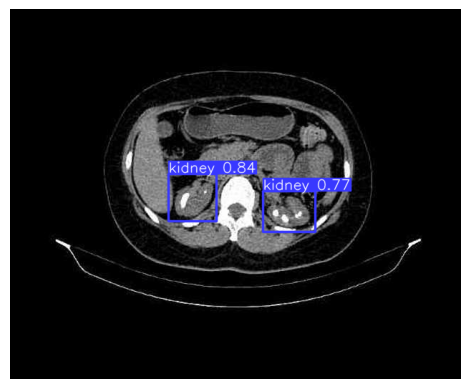

In [ ]:
from ultralytics import YOLO

# Load the custom-trained YOLO model
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

# Path to the image you want to predict on
img_path = "/content/drive/MyDrive/TestImage-PFA/test/Stone/16.jpg"

# Perform object detection on the image
results = model(img_path)

# Assuming results[0] is a list with each element containing the detection for one image
result = results[0]

# Extract bounding box coordinates and assign to variables
table1 = result.boxes.xyxy[0].tolist()  # Convert the tensor to a list
table2 = result.boxes.xyxy[1].tolist()  # Convert the tensor to a list

print("Bounding Box Coordinates for Table 1:", table1)
print("Bounding Box Coordinates for Table 2:", table2)
# Plot the annotations on the image
annotated_img = result.plot()

# Display the annotated image
plt.imshow(annotated_img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


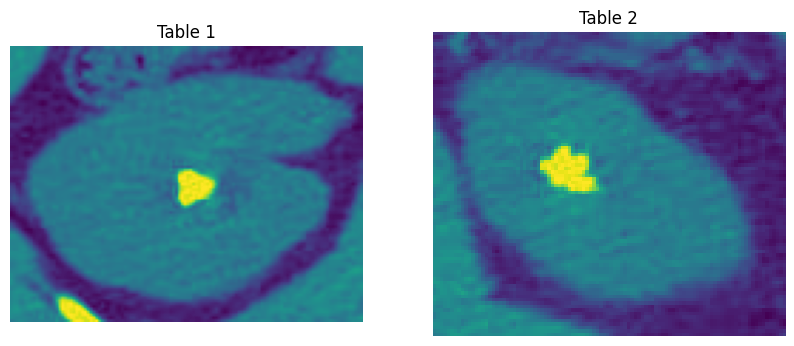

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to save cropped images
save_path = "/content/drive/MyDrive/CroppedImages/"

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Load the original image
original_image = Image.open("/content/drive/MyDrive/TestImage-PFA/test/Stone/1.jpg")

# Define function to crop and save image
def crop_and_save(image, box, save_name):
    cropped_image = image.crop(box)
    cropped_image.save(os.path.join(save_path, save_name))

# Crop and save images for table1 and table2
crop_and_save(original_image, table1, "table1_crop.jpg")
crop_and_save(original_image, table2, "table2_crop.jpg")

# Load the cropped images to display
table1_image = Image.open(os.path.join(save_path, "table1_crop.jpg"))
table2_image = Image.open(os.path.join(save_path, "table2_crop.jpg"))

# Display the cropped images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(table1_image)
axes[0].axis('off')
axes[0].set_title('Table 1')

axes[1].imshow(table2_image)
axes[1].axis('off')
axes[1].set_title('Table 2')

plt.show()


In [ ]:
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
import numpy as np


resnet101_model = load_model('/content/drive/MyDrive/Best Models/RESNET101.h5')
# Load and preprocess the two cropped images
img_path1 = "/content/drive/MyDrive/CroppedImages/table1_crop.jpg"  # Replace with the path to your first cropped image
img_path2 = "/content/drive/MyDrive/CroppedImages/table2_crop.jpg"  # Replace with the path to your second cropped image

img1 = image.load_img(img_path1, target_size=(48, 48))
img2 = image.load_img(img_path2, target_size=(48, 48))

img_array1 = image.img_to_array(img1)
img_array2 = image.img_to_array(img2)

img_array1 = np.expand_dims(img_array1, axis=0)
img_array2 = np.expand_dims(img_array2, axis=0)

img_array1 = preprocess_input(img_array1)
img_array2 = preprocess_input(img_array2)

# Make predictions
predictions = resnet101_model.predict([img_array1, img_array2])

# Interpret the predictions
predicted_class = np.argmax(predictions)
class_labels = {
    0: "Cyst",
    1: "Stone",
    2: "Normal",
    3: "Tumor"
}

# Map the predicted class index to the corresponding class label
predicted_class_label = class_labels[predicted_class]

print("Predicted class label:", predicted_class_label)

1/1 [==============================] - 5s 5s/step
Predicted class label: Stone



image 1/1 /content/drive/MyDrive/TestImage-PFA/test/Stone/16.jpg: 544x640 2 kidneys, 220.4ms
Speed: 7.2ms preprocess, 220.4ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


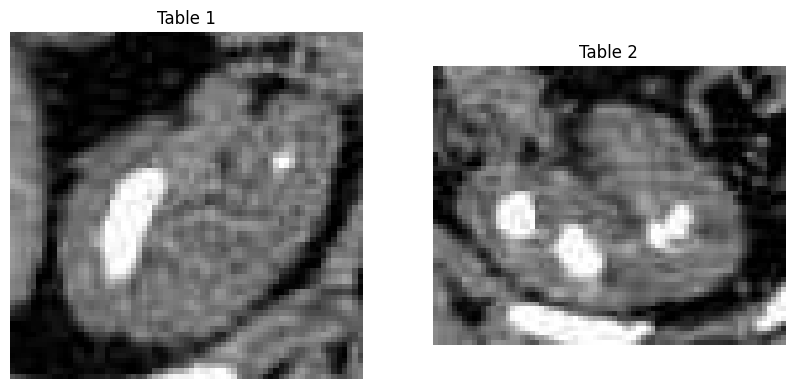

1/1 [==============================] - 6s 6s/step
Predicted class label: Stone


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
import numpy as np
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

img_path = "/content/drive/MyDrive/TestImage-PFA/test/Stone/16.jpg"
# Load the original image
original_image = Image.open(img_path)

# Convert the image to RGB format
original_image = original_image.convert("RGB")

# Define function to crop image
def crop_image(image, box):
    return image.crop(box)

# Perform object detection on the image
results = model(img_path)

# Assuming results[0] is a list with each element containing the detection for one image
result = results[0]

# Extract bounding box coordinates and assign to variables
table1 = result.boxes.xyxy[0].tolist()  # Convert the tensor to a list
table2 = result.boxes.xyxy[1].tolist()  # Convert the tensor to a list

# Crop images for table1 and table2
table1_image = crop_image(original_image, table1)
table2_image = crop_image(original_image, table2)


# Display the cropped images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(table1_image)
axes[0].axis('off')
axes[0].set_title('Table 1')

axes[1].imshow(table2_image)
axes[1].axis('off')
axes[1].set_title('Table 2')

plt.show()

resnet101_model = load_model('/content/drive/MyDrive/Best Models/RESNET101.h5')

resize_shape = (48, 48)
table1_image = table1_image.resize(resize_shape)
table2_image = table2_image.resize(resize_shape)

img_array1 = image.img_to_array(table1_image)
img_array2 = image.img_to_array(table2_image)

img_array1 = np.expand_dims(img_array1, axis=0)
img_array2 = np.expand_dims(img_array2, axis=0)

img_array1 = preprocess_input(img_array1)
img_array2 = preprocess_input(img_array2)

# Make predictions
predictions = resnet101_model.predict([img_array1, img_array2])

# Interpret the predictions
predicted_class = np.argmax(predictions)
class_labels = {
    0: "Cyst",
    1: "Stone",
    2: "Normal",
    3: "Tumor"
}

# Map the predicted class index to the corresponding class label
predicted_class_label = class_labels[predicted_class]

print("Predicted class label:", predicted_class_label)

In [ ]:
from ultralytics import YOLO
import os

# Load the custom-trained model
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

# Path to the directory containing images
folder_path = "/content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/test/images/kidney/"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
a=0
b=0
# Loop through the images, make predictions, and count bounding boxes
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)

    # Predict with the model
    results = model(img_path)

    # Access the first result
    result = results[0]

    # Get the number of bounding boxes detected
    num_boxes = len(result.boxes.xyxy)
    if(num_boxes==2):
      a+=1
    b+=1
    # Print the number of bounding boxes for each image
    print(f"Image: {img_file}, Number of bounding boxes: {num_boxes}")
print(a)
print(b)


image 1/1 /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/test/images/kidney/Tumor- (1429).jpg: 640x640 4 kidneys, 395.9ms
Speed: 12.5ms preprocess, 395.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Image: Tumor- (1429).jpg, Number of bounding boxes: 4

image 1/1 /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/test/images/kidney/Tumor- (1399).jpg: 640x640 2 kidneys, 319.7ms
Speed: 4.8ms preprocess, 319.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Image: Tumor- (1399).jpg, Number of bounding boxes: 2

image 1/1 /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/test/images/kidney/Tumor- (165).jpg: 640x640 2 kidneys, 314.1ms
Speed: 7.2ms preprocess, 314.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Image: Tumor- (165).jpg, Number of bounding boxes: 2

image 1/1 /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDat

KeyboardInterrupt: 

In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [ ]:
!pip install yolov8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: keyring
    Found existing installation: keyring 23.5.0
    Uninstalling keyring-23.5.0:
      Successfully uninstalled keyring-23.5.0
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
pip install -U git+https://github.com/ultralytics/yolov5.git


  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-9ree5j62
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-9ree5j62
  Resolved https://github.com/ultralytics/yolov5.git to commit c0380fd85549c8b315bb1fb2f423f9297e9744ec
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torchsummary import summary
import torch
import os

from ultralytics import YOLO

# Charger le modèle finetuné
model_path = '/content/drive/MyDrive/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Charger les données de test
test_data_path = '/content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/test/images/kidney'
test_dataset = CocoDetection(root=test_data_path, annFile=None, transform=transforms.ToTensor())

# Utiliser DataLoader pour charger les données
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# Fonction pour calculer mAP
def evaluate_model(model, dataloader):
    model.eval()  # Passer le modèle en mode évaluation
    detections = []
    ground_truths = []

    for images, targets in tqdm(dataloader):
        outputs = model(images)
        detections.extend(outputs)
        ground_truths.extend(targets)

    # Calculer mAP, en assumant une fonction calculate_map qui traite les sorties
    mAP = calculate_map(detections, ground_truths)  # Cette fonction doit être définie
    return mAP

# Évaluation
map_score = evaluate_model(model, test_loader)
print(f"mAP score: {map_score}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/SplittedDatasetReadyForYolo2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

100%|██████████| 6.23M/6.23M [00:00<00:00, 67.0MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/train/labels/kidney.cache... 3179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3179/3179 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/validation/labels/kidney.cache... 753 images, 0 backgrounds, 0 corrupt: 100%|██████████| 753/753 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.36G     0.6906     0.3247      0.961         41        640: 100%|██████████| 199/199 [02:21<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:33<00:00,  3.90s/it]

                   all        753       1506      0.995      0.994      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.33G     0.7096     0.3398      0.969         27        640: 100%|██████████| 199/199 [01:36<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]

                   all        753       1506      0.993      0.993      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.33G     0.7224     0.3545     0.9727         34        640: 100%|██████████| 199/199 [01:27<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        753       1506      0.992      0.994      0.995      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.31G     0.7308     0.3648     0.9788         40        640: 100%|██████████| 199/199 [01:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.992      0.992      0.994      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.33G     0.7324     0.3635     0.9847         38        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        753       1506      0.993      0.992      0.995      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.33G     0.7253     0.3574     0.9757         21        640: 100%|██████████| 199/199 [01:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]

                   all        753       1506      0.993      0.996      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.33G     0.7231     0.3556     0.9765         34        640: 100%|██████████| 199/199 [01:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.994      0.994      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.31G     0.7278     0.3573     0.9786         52        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.47it/s]

                   all        753       1506      0.992      0.994      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.31G     0.7111     0.3484      0.972         33        640: 100%|██████████| 199/199 [01:27<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]

                   all        753       1506      0.995      0.991      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.33G     0.7141     0.3474     0.9693         27        640: 100%|██████████| 199/199 [01:27<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]

                   all        753       1506      0.994      0.995      0.995      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.33G     0.7227     0.3504     0.9764         30        640: 100%|██████████| 199/199 [01:33<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.45it/s]

                   all        753       1506      0.993      0.987      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.33G     0.7116     0.3441     0.9695         45        640: 100%|██████████| 199/199 [01:28<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.09it/s]

                   all        753       1506      0.994      0.994      0.994      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.33G     0.7057     0.3406     0.9686         28        640: 100%|██████████| 199/199 [01:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        753       1506      0.994      0.992      0.995      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.33G     0.7033     0.3452      0.966         41        640: 100%|██████████| 199/199 [01:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.73it/s]

                   all        753       1506      0.992      0.993      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.33G     0.7001     0.3351     0.9606         34        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        753       1506      0.991      0.993      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.33G      0.708     0.3361     0.9707         29        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]

                   all        753       1506      0.994      0.987      0.995      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.33G     0.6991     0.3375     0.9629         39        640: 100%|██████████| 199/199 [01:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        753       1506      0.992      0.993      0.994      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.31G     0.7014     0.3326     0.9668         23        640: 100%|██████████| 199/199 [01:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.00it/s]

                   all        753       1506      0.995      0.994      0.995      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.33G     0.6899     0.3263     0.9605         37        640: 100%|██████████| 199/199 [01:33<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.40it/s]

                   all        753       1506      0.994      0.994      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.31G     0.6891     0.3248     0.9619         34        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.37it/s]

                   all        753       1506      0.994      0.995      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.33G     0.6872     0.3298     0.9595         34        640: 100%|██████████| 199/199 [01:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]

                   all        753       1506      0.996      0.993      0.995      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.33G     0.6781      0.323     0.9519         49        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        753       1506      0.995      0.996      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.33G      0.686     0.3269      0.958         45        640: 100%|██████████| 199/199 [01:27<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.53it/s]

                   all        753       1506      0.993      0.996      0.995      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.33G     0.6869     0.3248     0.9602         27        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        753       1506      0.997      0.993      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.33G     0.6826     0.3213     0.9594         35        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]

                   all        753       1506      0.993      0.996      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.31G     0.6727     0.3181     0.9557         41        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.20it/s]

                   all        753       1506      0.993      0.996      0.995      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.33G     0.6652     0.3136     0.9521         46        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.32it/s]

                   all        753       1506      0.996      0.993      0.995       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.33G     0.6755     0.3172     0.9559         39        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]


                   all        753       1506      0.993      0.995      0.995      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.33G     0.6762     0.3156     0.9576         31        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]

                   all        753       1506      0.997      0.995      0.995      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.33G     0.6714     0.3095      0.953         33        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.92it/s]

                   all        753       1506      0.994      0.995      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.33G     0.6713     0.3113      0.952         35        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        753       1506      0.995      0.995      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.33G     0.6614     0.3109     0.9498         38        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.995      0.994      0.995      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.33G     0.6648     0.3076     0.9405         31        640: 100%|██████████| 199/199 [01:27<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]

                   all        753       1506      0.997      0.992      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.33G     0.6638     0.3054     0.9478         23        640: 100%|██████████| 199/199 [01:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.29it/s]


                   all        753       1506      0.991      0.993      0.995      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.33G     0.6612     0.3102     0.9505         40        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]

                   all        753       1506      0.993      0.994      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.33G      0.661     0.3056     0.9492         40        640: 100%|██████████| 199/199 [01:32<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        753       1506      0.994      0.995      0.995      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.33G     0.6618     0.3046     0.9476         50        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.25it/s]


                   all        753       1506      0.996      0.994      0.995      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.33G     0.6575     0.3033     0.9502         30        640: 100%|██████████| 199/199 [01:34<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.87it/s]

                   all        753       1506      0.993      0.995      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.33G     0.6417     0.2957     0.9408         30        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        753       1506      0.995      0.994      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.33G      0.646     0.2983     0.9403         29        640: 100%|██████████| 199/199 [01:36<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        753       1506      0.995      0.993      0.995      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.33G      0.644      0.296     0.9468         38        640: 100%|██████████| 199/199 [01:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.36it/s]

                   all        753       1506      0.996      0.995      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.33G     0.6504     0.2968     0.9435         41        640: 100%|██████████| 199/199 [01:39<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.87it/s]

                   all        753       1506      0.994      0.994      0.994       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.33G     0.6456     0.2963     0.9453         42        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.994      0.994      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.33G     0.6462     0.2935     0.9414         44        640: 100%|██████████| 199/199 [01:33<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.34it/s]


                   all        753       1506      0.993      0.993      0.994      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.31G     0.6464     0.2958      0.945         50        640: 100%|██████████| 199/199 [01:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.22it/s]

                   all        753       1506      0.993      0.994      0.994      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.33G     0.6437     0.2894     0.9391         30        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.35it/s]

                   all        753       1506      0.995      0.994      0.994       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.33G     0.6473     0.2887     0.9415         33        640: 100%|██████████| 199/199 [01:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]

                   all        753       1506      0.993      0.995      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.31G     0.6303      0.286      0.936         34        640: 100%|██████████| 199/199 [01:27<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.49it/s]

                   all        753       1506      0.993      0.994      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.33G     0.6376     0.2877     0.9367         27        640: 100%|██████████| 199/199 [01:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.50it/s]

                   all        753       1506      0.994      0.995      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.33G     0.6377      0.288     0.9403         25        640: 100%|██████████| 199/199 [01:27<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.42it/s]

                   all        753       1506      0.994      0.996      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.33G     0.6328     0.2874     0.9364         35        640: 100%|██████████| 199/199 [01:33<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        753       1506      0.992      0.995      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.33G     0.6314     0.2844     0.9385         35        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.993      0.995      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.33G     0.6328      0.285     0.9352         31        640: 100%|██████████| 199/199 [01:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        753       1506      0.996      0.993      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.33G     0.6174     0.2749     0.9313         31        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]

                   all        753       1506      0.994      0.992      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.33G     0.6257     0.2806     0.9359         45        640: 100%|██████████| 199/199 [01:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.35it/s]

                   all        753       1506      0.991      0.992      0.994      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.33G     0.6263     0.2827     0.9327         29        640: 100%|██████████| 199/199 [01:29<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.23it/s]

                   all        753       1506      0.995      0.995      0.994      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.33G     0.6289     0.2794     0.9344         42        640: 100%|██████████| 199/199 [01:31<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]

                   all        753       1506      0.994      0.995      0.994      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.33G     0.6181     0.2755     0.9345         44        640: 100%|██████████| 199/199 [01:26<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]

                   all        753       1506      0.995      0.994      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.33G     0.6221     0.2795     0.9347         35        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        753       1506      0.993      0.994      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.31G      0.617     0.2765     0.9311         41        640: 100%|██████████| 199/199 [01:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        753       1506      0.993      0.993      0.994      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.33G     0.6162     0.2752     0.9322         31        640: 100%|██████████| 199/199 [01:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.87it/s]

                   all        753       1506      0.993      0.993      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.31G     0.6171     0.2762     0.9327         39        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.07it/s]

                   all        753       1506      0.993      0.993      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.31G     0.6084     0.2721     0.9256         38        640: 100%|██████████| 199/199 [01:33<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.30it/s]

                   all        753       1506      0.993      0.994      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.33G     0.6102     0.2722     0.9271         42        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.36it/s]

                   all        753       1506      0.993      0.995      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.33G     0.6109     0.2714     0.9295         52        640: 100%|██████████| 199/199 [01:32<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.25it/s]

                   all        753       1506      0.992      0.992      0.994      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.33G     0.6087     0.2715     0.9311         44        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.19it/s]

                   all        753       1506      0.993      0.993      0.994      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.33G      0.611     0.2684     0.9301         46        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        753       1506      0.995      0.995      0.994      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.33G     0.6029     0.2672     0.9259         37        640: 100%|██████████| 199/199 [01:25<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]


                   all        753       1506      0.994      0.994      0.995      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.31G     0.5999     0.2662     0.9272         28        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]


                   all        753       1506      0.993      0.996      0.995      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.33G     0.6084     0.2666     0.9257         28        640: 100%|██████████| 199/199 [01:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.25it/s]

                   all        753       1506      0.994      0.995      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.33G     0.6059     0.2686     0.9271         37        640: 100%|██████████| 199/199 [01:34<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.24it/s]

                   all        753       1506      0.994      0.994      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.33G     0.5997     0.2676     0.9262         37        640: 100%|██████████| 199/199 [01:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.14it/s]

                   all        753       1506      0.994      0.995      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.33G     0.5939     0.2629     0.9194         27        640: 100%|██████████| 199/199 [01:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        753       1506      0.995      0.995      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.33G     0.5944      0.263     0.9235         38        640: 100%|██████████| 199/199 [01:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.74it/s]

                   all        753       1506      0.993      0.992      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.33G     0.5995     0.2637     0.9223         16        640: 100%|██████████| 199/199 [01:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.74it/s]

                   all        753       1506      0.994      0.993      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.31G     0.5911      0.259     0.9245         26        640: 100%|██████████| 199/199 [01:28<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        753       1506      0.994      0.994      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.33G     0.5916     0.2588     0.9242         24        640: 100%|██████████| 199/199 [01:32<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.28it/s]

                   all        753       1506      0.995      0.993      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.33G     0.5919     0.2581     0.9222         28        640: 100%|██████████| 199/199 [01:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.27it/s]

                   all        753       1506      0.994      0.995      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.33G     0.5826     0.2522     0.9186         39        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]

                   all        753       1506      0.995      0.995      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.33G     0.5944      0.258     0.9209         21        640: 100%|██████████| 199/199 [01:26<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        753       1506      0.993      0.994      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.33G      0.589     0.2542     0.9208         30        640: 100%|██████████| 199/199 [01:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.22it/s]

                   all        753       1506      0.993      0.994      0.994      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.33G     0.5785     0.2505     0.9152         44        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]

                   all        753       1506      0.995      0.995      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.33G     0.5786     0.2498     0.9171         35        640: 100%|██████████| 199/199 [01:31<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]

                   all        753       1506      0.994      0.995      0.994      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.33G     0.5783     0.2484     0.9135         49        640: 100%|██████████| 199/199 [01:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.48it/s]

                   all        753       1506      0.995      0.995      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.31G     0.5866     0.2527     0.9222         31        640: 100%|██████████| 199/199 [01:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.07it/s]

                   all        753       1506      0.995      0.994      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.31G     0.5793     0.2488     0.9148         27        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.996      0.996      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.33G      0.576     0.2463     0.9138         38        640: 100%|██████████| 199/199 [01:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]

                   all        753       1506      0.996      0.996      0.995      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.33G     0.5766     0.2481     0.9157         40        640: 100%|██████████| 199/199 [01:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.24it/s]

                   all        753       1506      0.995      0.995      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.33G     0.5702     0.2436     0.9141         48        640: 100%|██████████| 199/199 [01:28<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.53it/s]

                   all        753       1506      0.994      0.995      0.994       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.31G     0.5727     0.2463     0.9139         23        640: 100%|██████████| 199/199 [01:31<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]

                   all        753       1506      0.993      0.995      0.994      0.639


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.49G     0.5168     0.2011      0.892         22        640: 100%|██████████| 199/199 [01:24<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        753       1506      0.995      0.995      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.31G     0.5162     0.1994     0.8899         22        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        753       1506      0.994      0.995      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.31G     0.5109     0.1979     0.8905         22        640: 100%|██████████| 199/199 [01:22<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        753       1506      0.994      0.995      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.31G     0.5107     0.1987     0.8909         22        640: 100%|██████████| 199/199 [01:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.73it/s]

                   all        753       1506      0.995      0.995      0.994      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.31G     0.5082     0.1956     0.8905         22        640: 100%|██████████| 199/199 [01:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        753       1506      0.995      0.995      0.994      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.31G     0.5067     0.1964      0.888         22        640: 100%|██████████| 199/199 [01:27<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        753       1506      0.995      0.995      0.994      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.31G     0.5063     0.1946     0.8886         22        640: 100%|██████████| 199/199 [01:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.73it/s]

                   all        753       1506      0.995      0.994      0.994       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.31G     0.5054     0.1938     0.8898         22        640: 100%|██████████| 199/199 [01:27<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.04it/s]

                   all        753       1506      0.995      0.995      0.994      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.31G      0.503     0.1931      0.886         22        640: 100%|██████████| 199/199 [01:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.96it/s]

                   all        753       1506      0.995      0.994      0.994      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.31G     0.5025     0.1923     0.8895         23        640: 100%|██████████| 199/199 [01:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.23it/s]

                   all        753       1506      0.995      0.995      0.994       0.64



100 epochs completed in 2.909 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.45it/s]


                   all        753       1506      0.995      0.994      0.995      0.655
Speed: 0.5ms preprocess, 2.8ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
0it [00:00, ?it/s]


NameError: name 'calculate_map' is not defined

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1O9pwW1Dzv0X84uiBGm1N4g0g2upKMAyV/SplittedDatasetReadyForYolo2/SplittedDatasetReadyForYolo2/validation/labels/kidney.cache... 753 images, 0 backgrounds, 0 corrupt: 100%|██████████| 753/753 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:19<00:00,  2.49it/s]


                   all        753       1506      0.993      0.995      0.995      0.662
Speed: 1.1ms preprocess, 4.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val4
Mean Results: [0.9931646311769212, 0.9953519256308101, 0.9947964229795389, 0.6624571885800152]
Precisions: [0.9931646311769212]
Recalls: [0.9953519256308101]


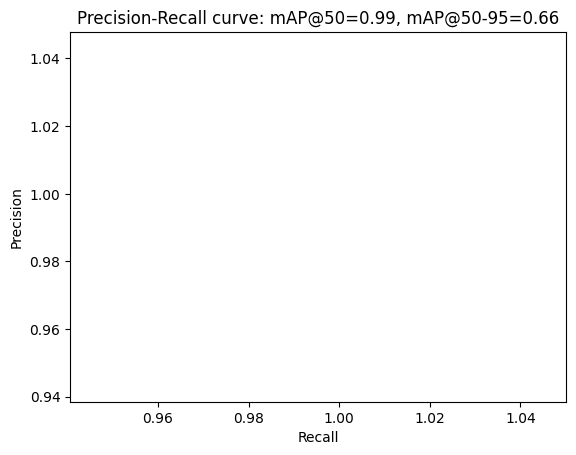

In [ ]:
import subprocess
import locale
import os

# Set locale to UTF-8
os.environ['LC_ALL'] = 'C.UTF-8'
os.environ['LANG'] = 'C.UTF-8'
locale.setlocale(locale.LC_ALL, 'C.UTF-8')

# Install Dependencies
subprocess.run(['pip', 'install', '-U', 'torch', 'torchvision'], check=True)
subprocess.run(['pip', 'install', 'ultralytics'], check=True)
subprocess.run(['pip', 'install', 'matplotlib'], check=True)

# Import Libraries
import torch
from ultralytics import YOLO
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Load the YOLO Model
model_path = '/content/drive/MyDrive/runs/detect/train/weights/best.pt'  # Replace with your .pt model path
model = YOLO(model_path)

# Path to the dataset configuration file
data_yaml = '/content/drive/MyDrive/SplittedDatasetReadyForYolo2/data.yaml'  # Replace with your .yaml file path

# Evaluate the Model and Calculate mAP
results = model.val(data=data_yaml, split='val')

# Get mean results for overall metrics
mean_results = results.mean_results()
print("Mean Results:", mean_results)

# Extract detailed metrics for plotting precision-recall curve
class_results = [results.class_result(i) for i in range(len(results.names))]
precisions = [result[0] for result in class_results]
recalls = [result[1] for result in class_results]

# Print extracted precision and recall values for verification
print("Precisions:", precisions)
print("Recalls:", recalls)

# Plot Precision-Recall Curve
plt.figure()
for precision, recall in zip(precisions, recalls):
    plt.step(recall, precision, where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve: mAP@50={mean_results[2]:.2f}, mAP@50-95={mean_results[3]:.2f}')
plt.show()


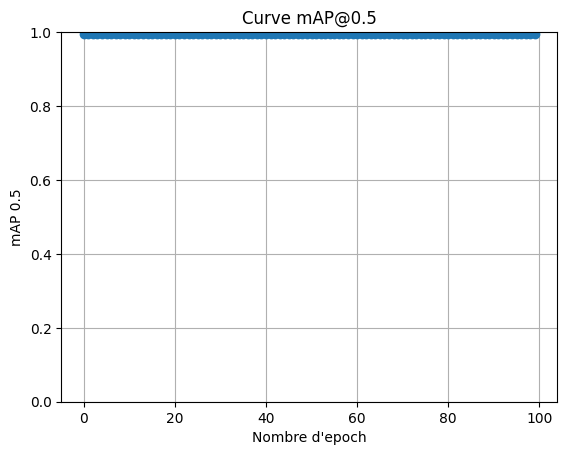

In [ ]:
import matplotlib.pyplot as plt

# Example data list with values from 0 to 0.7
y = [0.995, 0.995, 0.995, 0.994, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995,
 0.995, 0.994, 0.995, 0.995, 0.995, 0.995, 0.994, 0.995, 0.995, 0.995,
 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995,
 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995,
 0.994, 0.995, 0.994, 0.994, 0.994, 0.994, 0.995, 0.995, 0.995, 0.995,
 0.995, 0.995, 0.995, 0.995, 0.994, 0.994, 0.994, 0.995, 0.995, 0.995,
 0.995, 0.994, 0.994, 0.994, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995,
 0.995, 0.995, 0.995, 0.994, 0.994, 0.995, 0.994, 0.995, 0.994, 0.995,
 0.995, 0.995, 0.995, 0.994, 0.994, 0.995, 0.994, 0.994, 0.995, 0.995,
 0.995, 0.994, 0.995, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994]


# Generate x values based on the indices of y
x = list(range(len(y)))

# Plotting the curve
plt.plot(x, y, marker='o')  # marker='o' adds circle markers at each data point
plt.title("Curve mAP@0.5")
plt.xlabel("Nombre d'epoch")
plt.ylabel("mAP 0.5")
plt.ylim(0, 1)  # Ensure the y-axis ranges from 0 to 1
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot


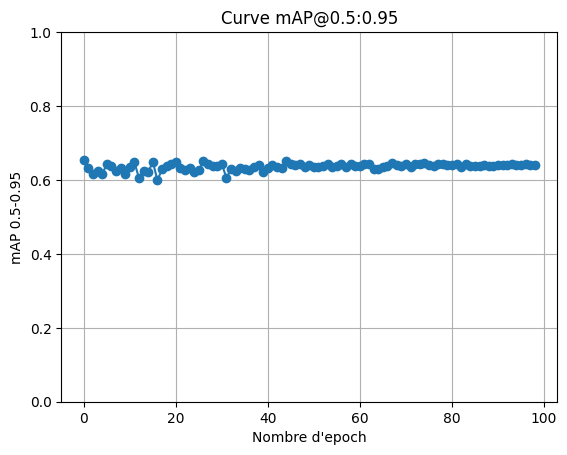

In [ ]:
import matplotlib.pyplot as plt

# Example data list with values from 0 to 0.7
y = [0.654, 0.633, 0.616, 0.623, 0.617, 0.642, 0.639, 0.625, 0.632, 0.617,
 0.634, 0.648, 0.604, 0.625, 0.621, 0.649, 0.599, 0.629, 0.639, 0.642,
 0.649, 0.633, 0.626, 0.633, 0.621, 0.627, 0.65, 0.642, 0.638, 0.637,
 0.643, 0.605, 0.63, 0.623, 0.632, 0.629, 0.627, 0.634, 0.641, 0.622,
 0.632, 0.64, 0.636, 0.632, 0.65, 0.643, 0.64, 0.642, 0.635, 0.64,
 0.636, 0.634, 0.639, 0.642, 0.634, 0.638, 0.642, 0.636, 0.642, 0.637,
 0.637, 0.643, 0.642, 0.629, 0.631, 0.634, 0.638, 0.647, 0.64, 0.637,
 0.642, 0.636, 0.643, 0.643, 0.646, 0.641, 0.639, 0.643, 0.643, 0.641,
 0.64, 0.644, 0.636, 0.643, 0.639, 0.638, 0.639, 0.64, 0.639, 0.637,
 0.64, 0.641, 0.641, 0.642, 0.641, 0.64, 0.642, 0.641, 0.64]



# Generate x values based on the indices of y
x = list(range(len(y)))

# Plotting the curve
plt.plot(x, y, marker='o')  # marker='o' adds circle markers at each data point
plt.title("Curve mAP@0.5:0.95")
plt.xlabel("Nombre d'epoch")
plt.ylabel("mAP 0.5-0.95")
plt.ylim(0, 1)  # Ensure the y-axis ranges from 0 to 1
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot
